In [1]:
import os
import json
import requests
import xarray

In [2]:
server_url = 'http://147.102.109.27:5002'

In [ ]:
#boundingbox = [-124.1015625, 52.05249047600099, -119.88281249999999, 59.712097173322924]

### {root}/collections
Metadata describing the spatial collections (coverages) available from this API; filtering via bbox, etc. parameters

In [45]:
collections_req = requests.get(f"{server_url}/collections", verify = False)
collections_req

<Response [200]>

In [46]:
# Get json response
collections = collections_req.json()
collections

{'collections': [{'links': [{'type': 'text/html',
     'rel': 'canonical',
     'title': 'data',
     'href': 'https://climate-change.canada.ca/climate-data/#/cmip5-data',
     'hreflang': 'en-CA'},
    {'type': 'application/json',
     'rel': 'coverage',
     'title': 'Coverage offering',
     'href': 'http://147.102.109.27:5002/collections/cmip5/coverage?f=json'},
    {'type': 'application/json',
     'rel': 'metadata',
     'title': 'Coverage metadata',
     'href': 'http://147.102.109.27:5002/collections/cmip5/coverage/metadata?f=json'},
    {'type': 'application/json',
     'rel': 'data',
     'title': 'Coverage data',
     'href': 'http://147.102.109.27:5002/collections/cmip5/coverage/all?f=json'},
    {'type': 'application/json',
     'rel': 'self',
     'title': 'This document as JSON',
     'href': 'http://147.102.109.27:5002/collections/cmip5?f=json'},
    {'type': 'application/ld+json',
     'rel': 'alternate',
     'title': 'This document as RDF (JSON-LD)',
     'href': 'ht

In [47]:
# This server contains a mixture of collections with different data models. Pull out the coverage collections
collections_cov = [x for x in collections_req.json()['collections'] if x['itemType'] == 'coverage']
collections_cov

[{'links': [{'type': 'text/html',
    'rel': 'canonical',
    'title': 'data',
    'href': 'https://climate-change.canada.ca/climate-data/#/cmip5-data',
    'hreflang': 'en-CA'},
   {'type': 'application/json',
    'rel': 'coverage',
    'title': 'Coverage offering',
    'href': 'http://147.102.109.27:5002/collections/cmip5/coverage?f=json'},
   {'type': 'application/json',
    'rel': 'metadata',
    'title': 'Coverage metadata',
    'href': 'http://147.102.109.27:5002/collections/cmip5/coverage/metadata?f=json'},
   {'type': 'application/json',
    'rel': 'data',
    'title': 'Coverage data',
    'href': 'http://147.102.109.27:5002/collections/cmip5/coverage/all?f=json'},
   {'type': 'application/json',
    'rel': 'self',
    'title': 'This document as JSON',
    'href': 'http://147.102.109.27:5002/collections/cmip5?f=json'},
   {'type': 'application/ld+json',
    'rel': 'alternate',
    'title': 'This document as RDF (JSON-LD)',
    'href': 'http://147.102.109.27:5002/collections/cmi

One can use the href links to drill down into the resource to get information/metadata and data

In [50]:
collections_cov[0].keys()

dict_keys(['links', 'id', 'itemType', 'title', 'description', 'keywords', 'extent'])

In [55]:
[x['id'] for x in collections_cov]

['cmip5']

In [98]:
cmip5_urls = {}
for c in collections_cov:
    cov_id = c['id']
    #print(cov_id)
    cov_links = c['links']
    for l in cov_links:
        #print(l['href'])
        cmip5_urls.update({l['title']: l['href'].split('?')[0]})

cmip5_urls

{'data': 'https://climate-change.canada.ca/climate-data/#/cmip5-data',
 'Coverage offering': 'http://147.102.109.27:5002/collections/cmip5/coverage',
 'Coverage metadata': 'http://147.102.109.27:5002/collections/cmip5/coverage/metadata',
 'Coverage data': 'http://147.102.109.27:5002/collections/cmip5/coverage/all',
 'This document as JSON': 'http://147.102.109.27:5002/collections/cmip5',
 'This document as RDF (JSON-LD)': 'http://147.102.109.27:5002/collections/cmip5',
 'This document as HTML': 'http://147.102.109.27:5002/collections/cmip5'}

### {root}/collections/{coverageid}/coverage
A general description including coverage specific metadata like envelope, rangetype, and service metadata such as the coverage’s native format

In [108]:
cmip5_desc = requests.get('http://147.102.109.27:5002/collections/cmip5/coverage/metadata', verify = False)
cmip5_desc

<Response [200]>

In [109]:
# Get response as dict
cmip5_desc.json()

{'bounds': [-150.0, 40.0, -45.0, 90.0],
 'meta': {'driver': 'netCDF',
  'dtype': 'float32',
  'nodata': 1.0000000200408773e+20,
  'width': 105,
  'height': 50,
  'count': 95,
  'crs': None,
  'transform': [1.0, 0.0, -150.0, 0.0, -1.0, 90.0, 0.0, 0.0, 1.0]},
 'tags': {'lat#axis': 'Y',
  'lat#long_name': 'latitude',
  'lat#standard_name': 'latitude',
  'lat#units': 'degrees_north',
  'lon#axis': 'X',
  'lon#long_name': 'longitude',
  'lon#standard_name': 'longitude',
  'lon#units': 'degrees_east',
  'NC_GLOBAL#comment': 'CMIP5 ensemble percentiles; from monthly means provided by CRD-ECCC; the models considered in the ensemble are: bcccsm11m, bcccsm11, bnuesm, canesm2, ccsm4, cesm1cam5, cesm1waccm, cnrmcm5, csiromk360, ecearth, fgoalsg2, fioesm, gfdlcm3, gfdlesm2g, gfdlesm2m, gisse2h, gisse2r, hadgem2ao, hadgem2es, ipslcm5alr, ipslcm5amr, miroc5, mirocesmchem, mirocesm, mpiesmlr, mpiesmmr, mricgcm3, noresm1me, noresm1m,',
  'NC_GLOBAL#Conventions': 'CF-1.4',
  'NC_GLOBAL#history': 'Tue Ju

### {root}/collections/{coverageid/coverage/metadata}
Metadata describing the coverage which has the unique identifier {coverageid} following the API

In [106]:
cmip5_meta = requests.get('http://147.102.109.27:5002/collections/cmip5/coverage/metadata', verify = False)
cmip5_meta

<Response [200]>

In [107]:
# Get response as dict
cmip5_meta.json()

{'bounds': [-150.0, 40.0, -45.0, 90.0],
 'meta': {'driver': 'netCDF',
  'dtype': 'float32',
  'nodata': 1.0000000200408773e+20,
  'width': 105,
  'height': 50,
  'count': 95,
  'crs': None,
  'transform': [1.0, 0.0, -150.0, 0.0, -1.0, 90.0, 0.0, 0.0, 1.0]},
 'tags': {'lat#axis': 'Y',
  'lat#long_name': 'latitude',
  'lat#standard_name': 'latitude',
  'lat#units': 'degrees_north',
  'lon#axis': 'X',
  'lon#long_name': 'longitude',
  'lon#standard_name': 'longitude',
  'lon#units': 'degrees_east',
  'NC_GLOBAL#comment': 'CMIP5 ensemble percentiles; from monthly means provided by CRD-ECCC; the models considered in the ensemble are: bcccsm11m, bcccsm11, bnuesm, canesm2, ccsm4, cesm1cam5, cesm1waccm, cnrmcm5, csiromk360, ecearth, fgoalsg2, fioesm, gfdlcm3, gfdlesm2g, gfdlesm2m, gisse2h, gisse2r, hadgem2ao, hadgem2es, ipslcm5alr, ipslcm5amr, miroc5, mirocesmchem, mirocesm, mpiesmlr, mpiesmmr, mricgcm3, noresm1me, noresm1m,',
  'NC_GLOBAL#Conventions': 'CF-1.4',
  'NC_GLOBAL#history': 'Tue Ju

#### Should the responses be the same for "{root}/collections/{coverageid}/coverage" and "{root}/collections/{coverageid}/coverage/metadata"?

{root}/collections/{coverageid}/coverage/domainset
{root}/collections/{coverageid}/coverage/rangetype
{root}/collections/{coverageid}/coverage/metadata
{root}/collections/{coverageid}/coverage/rangeset
{root}/collections/{coverageid}/coverage/description - Returns domainset, rangetype, and metadata - but not the rangeset
{root}/collections/{coverageid}/coverage/all -

In [128]:
cmip5_cov = requests.get('http://147.102.109.27:5002/collections/cmip5/coverage/all', params={"rangeSubset":1}, verify=False)
cmip5_cov

<Response [200]>

In [129]:
# Print return - Single time step
cmip5_cov.json()

[[[0.4414435029029846,
   0.4412376880645752,
   0.4426080584526062,
   0.4426102340221405,
   0.44552719593048096,
   0.44886577129364014,
   0.4488690495491028,
   0.4523758590221405,
   0.455128937959671,
   0.45628875494003296,
   0.4562889635562897,
   0.4564216732978821,
   0.4557533264160156,
   0.45575258135795593,
   0.4550260305404663,
   0.45550841093063354,
   0.4567638039588928,
   0.45676547288894653,
   0.4585297107696533,
   0.46076327562332153,
   0.4607650637626648,
   0.4624013304710388,
   0.4629729092121124,
   0.4630873203277588,
   0.4630868434906006,
   0.46314045786857605,
   0.4638589918613434,
   0.4638602137565613,
   0.46546226739883423,
   0.46749454736709595,
   0.46940675377845764,
   0.4694044589996338,
   0.4647451639175415,
   0.4647420346736908,
   0.45927372574806213,
   0.4592701196670532,
   0.45334893465042114,
   0.45334529876708984,
   0.44810420274734497,
   0.44444751739501953,
   0.4444458484649658,
   0.4422130882740021,
   0.44221249222755

In [130]:
# Create a simple xarray of the coverage
cmip5_cov_array = xarray.DataArray(cmip5_cov.json())
cmip5_cov_array

<xarray.DataArray (dim_0: 1, dim_1: 50, dim_2: 105)>
array([[[0.441444, 0.441238, ..., 0.397873, 0.398873],
        [0.514816, 0.513774, ..., 0.474968, 0.479044],
        ...,
        [3.366747, 3.328666, ..., 3.678434, 3.753727],
        [3.320999, 3.254253, ..., 3.99786 , 3.992284]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

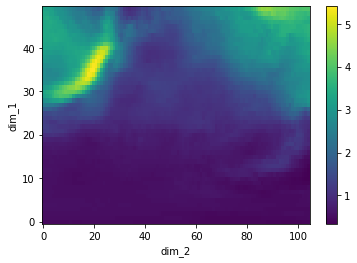

In [131]:
# Plot array
cmip5_cov_array.plot()

In [121]:
# Get all time steps - small enough dataset to do this
cmip5_cov_all = requests.get('http://147.102.109.27:5002/collections/cmip5/coverage/all', verify=False)
cmip5_cov_all

<Response [200]>

In [122]:
# Create a simple xarray of the coverage with all time steps
cmip5_cov_all_array = xarray.DataArray(cmip5_cov_all.json())
cmip5_cov_all_array

<xarray.DataArray (dim_0: 95, dim_1: 50, dim_2: 105)>
array([[[0.441444, 0.441238, ..., 0.397873, 0.398873],
        [0.514816, 0.513774, ..., 0.474968, 0.479044],
        ...,
        [3.366747, 3.328666, ..., 3.678434, 3.753727],
        [3.320999, 3.254253, ..., 3.99786 , 3.992284]],

       [[0.450819, 0.450523, ..., 0.444769, 0.443958],
        [0.477023, 0.482783, ..., 0.446509, 0.446109],
        ...,
        [3.518446, 3.507964, ..., 3.77067 , 3.715262],
        [3.287613, 3.329384, ..., 3.921457, 3.806453]],

       ...,

       [[0.784278, 0.784655, ..., 0.673695, 0.6737  ],
        [0.812809, 0.813974, ..., 0.715359, 0.715156],
        ...,
        [3.499937, 3.441237, ..., 4.314861, 4.275602],
        [3.340828, 3.292892, ..., 4.271112, 4.201079]],

       [[0.745633, 0.745633, ..., 0.679673, 0.679672],
        [0.786685, 0.787066, ..., 0.685302, 0.685293],
        ...,
        [3.735055, 3.640365, ..., 4.247163, 4.282894],
        [3.687961, 3.536938, ..., 4.379104, 4.3350